## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss
from sklearn.metrics import (
    accuracy_score, precision_score, average_precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## 2. Loading the Dataset

In [2]:
creditfraud = pd.read_csv('creditcard.csv')

## 3. Dataset Overview

In [3]:
print("==== BASIC INFO ====")
print("Shape (rows, cols):", creditfraud.shape)
print("Columns:", creditfraud.columns.tolist())

print("\n==== GLIMPSE (FIRST 5 ROWS) ====")
display(creditfraud.head())

print("\n==== GLIMPSE (RANDOM SAMPLE 5 ROWS) ====")
display(creditfraud.sample(5, random_state=42))

print("\n==== GLIMPSE (LAST 5 ROWS) ====")
display(creditfraud.tail())

==== BASIC INFO ====
Shape (rows, cols): (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

==== GLIMPSE (FIRST 5 ROWS) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



==== GLIMPSE (RANDOM SAMPLE 5 ROWS) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0



==== GLIMPSE (LAST 5 ROWS) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
print("\n==== creditfraud.info() ====")
creditfraud.info()


==== creditfraud.info() ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non

## 4. Data Quality Check

In [5]:
print("\n==== MISSING VALUES ====")
missing = creditfraud.isna().sum().sort_values(ascending=False)
print(missing[missing > 0] if (missing > 0).any() else "No missing values.")

print("\n==== DUPLICATES ====")
dup_count = creditfraud.duplicated().sum()
print("Duplicate rows:", dup_count)


==== MISSING VALUES ====
No missing values.

==== DUPLICATES ====
Duplicate rows: 1081


In [6]:
before = len(creditfraud)
creditfraud = creditfraud.drop_duplicates().reset_index(drop=True)
after = len(creditfraud)

print(f"Removed {before - after} duplicate rows.")
print(f"New dataset size: {after}")


Removed 1081 duplicate rows.
New dataset size: 283726


## 5. Statistical Summary

In [7]:
display(creditfraud.describe().T)

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


## 6. Class Imbalance Analysis

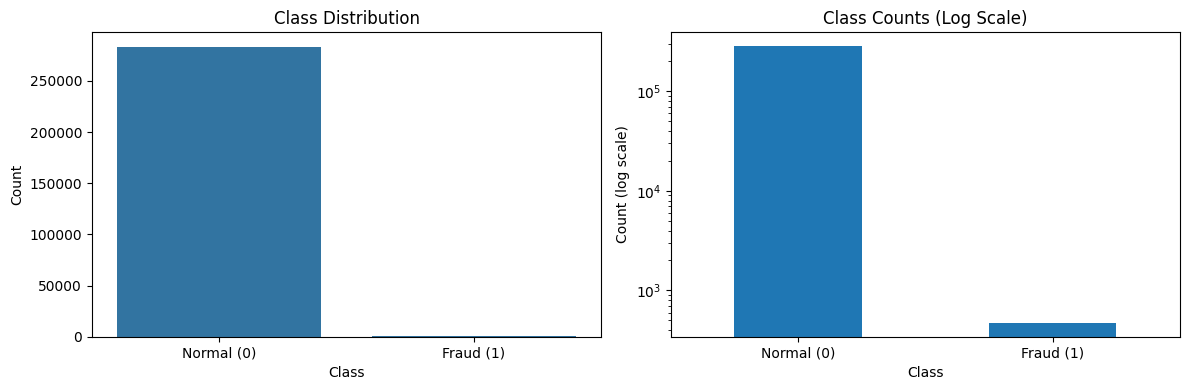

In [8]:
class_counts = creditfraud["Class"].value_counts()
class_perc = creditfraud["Class"].value_counts(normalize=True) * 100
summary_tbl = pd.DataFrame({"count": class_counts, "percent": class_perc})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Normal count bar plot 
sns.countplot(x="Class", data=creditfraud, ax=axes[0])
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(["Normal (0)", "Fraud (1)"])
axes[0].set_title("Class Distribution")
axes[0].set_ylabel("Count")

#  Log-scale bar plot 
summary_tbl["count"].plot(kind="bar", logy=True, ax=axes[1])
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(["Normal (0)", "Fraud (1)"], rotation=0)
axes[1].set_title("Class Counts (Log Scale)")
axes[1].set_ylabel("Count (log scale)")

plt.tight_layout()
plt.show()


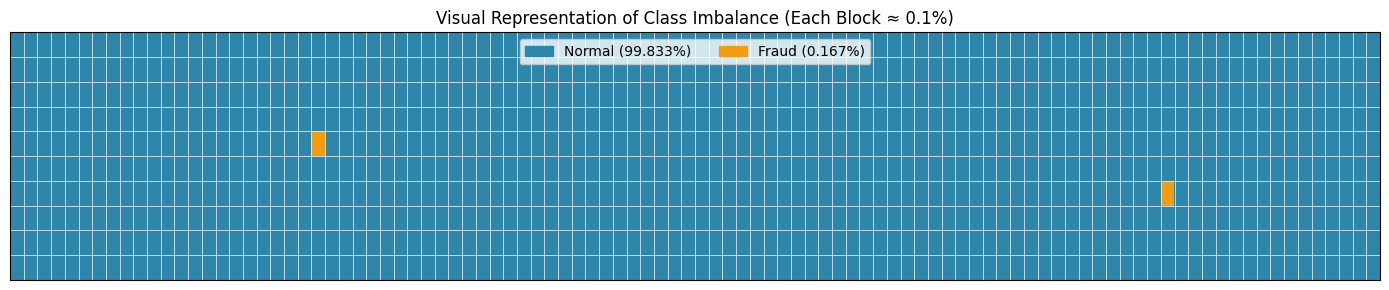

In [9]:
perc = creditfraud["Class"].value_counts(normalize=True) * 100
normal_perc = perc[0]
fraud_perc = perc[1]

##waffle plot
total_blocks = 1000
n_fraud = int(round(fraud_perc / 100 * total_blocks))
n_normal = total_blocks - n_fraud

waffle = np.array([0]*n_normal + [1]*n_fraud)
np.random.shuffle(waffle)
grid = waffle.reshape((10, 100))

colors = ["#2E86AB", "#F39C12"] 

fig, ax = plt.subplots(figsize=(14, 3))
im = ax.imshow(grid, cmap=plt.matplotlib.colors.ListedColormap(colors), aspect="auto")

ax.set_xticks(np.arange(-.5, 100, 1), minor=True)
ax.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

ax.set_title("Visual Representation of Class Imbalance (Each Block ≈ 0.1%)", fontsize=12)

legend_elements = [
    mpatches.Patch(color=colors[0], label=f"Normal ({normal_perc:.3f}%)"),
    mpatches.Patch(color=colors[1], label=f"Fraud ({fraud_perc:.3f}%)")
]
ax.legend(handles=legend_elements, loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


## 7. Transaction Behavior Analysis

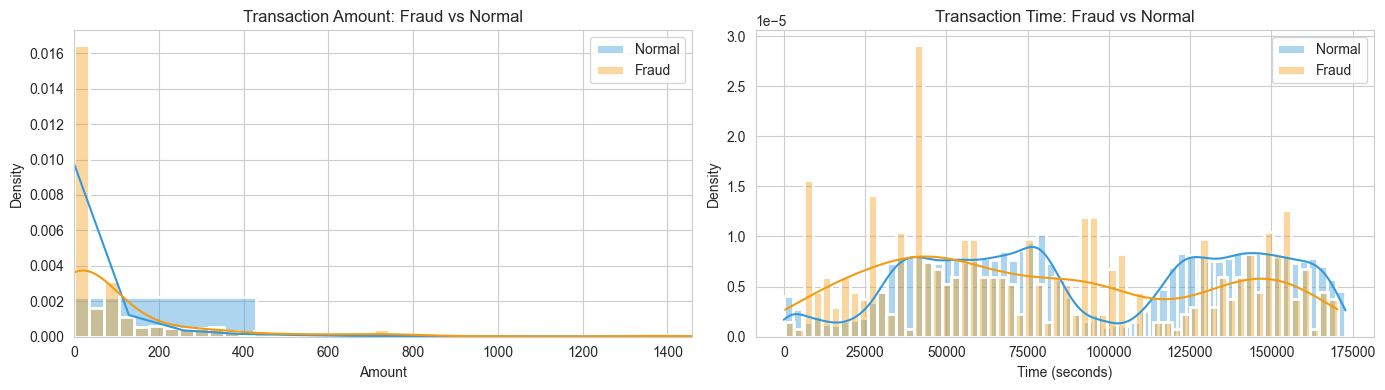

In [10]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

common_style = dict(
    bins=60,
    kde=True,
    stat="density",
    alpha=0.4,
    linewidth=2
)

# ---- Amount: Fraud vs Normal ----
sns.histplot(
    creditfraud[creditfraud["Class"] == 0]["Amount"],
    color="#3498DB",  
    label="Normal",
    ax=axes[0],
    **common_style
)

sns.histplot(
    creditfraud[creditfraud["Class"] == 1]["Amount"],
    color="#F39C12", 
    label="Fraud",
    ax=axes[0],
    **common_style
)

axes[0].set_title("Transaction Amount: Fraud vs Normal")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Density")
axes[0].set_xlim(0, creditfraud["Amount"].quantile(0.995))
axes[0].legend()

# ---- Time: Fraud vs Normal ----
sns.histplot(
    creditfraud[creditfraud["Class"] == 0]["Time"],
    color="#3498DB",
    label="Normal",
    ax=axes[1],
    **common_style
)

sns.histplot(
    creditfraud[creditfraud["Class"] == 1]["Time"],
    color="#F39C12",
    label="Fraud",
    ax=axes[1],
    **common_style
)

axes[1].set_title("Transaction Time: Fraud vs Normal")
axes[1].set_xlabel("Time (seconds)")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


In [11]:
corr_with_class = creditfraud.corr(numeric_only=True)["Class"].sort_values()
print("\n==== TOP NEGATIVELY CORRELATED FEATURES ====")
print(corr_with_class.head(10))


==== TOP NEGATIVELY CORRELATED FEATURES ====
V17   -0.313498
V14   -0.293375
V12   -0.250711
V10   -0.206971
V16   -0.187186
V3    -0.182322
V7    -0.172347
V18   -0.105340
V1    -0.094486
V9    -0.094021
Name: Class, dtype: float64


In [12]:
print("\n==== TOP POSITIVELY CORRELATED FEATURES ====")
print(corr_with_class.tail(10))


==== TOP POSITIVELY CORRELATED FEATURES ====
V28      0.009682
V20      0.021486
V27      0.021892
V21      0.026357
V8       0.033068
V19      0.033631
V2       0.084624
V4       0.129326
V11      0.149067
Class    1.000000
Name: Class, dtype: float64


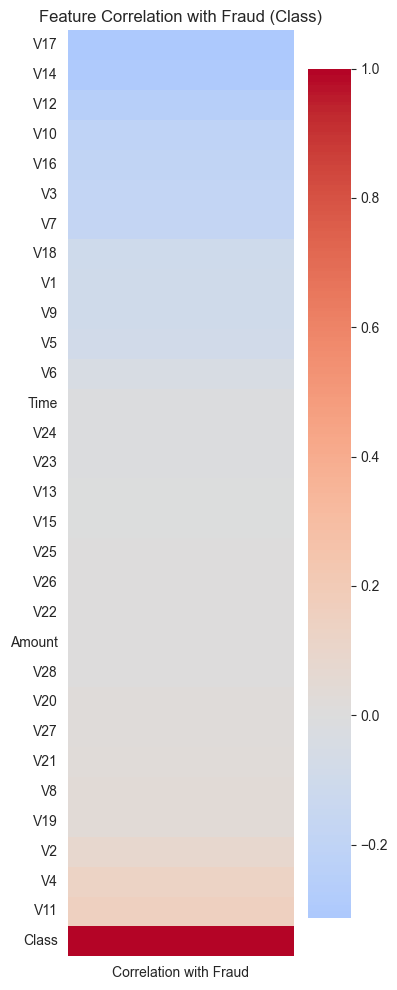

In [13]:
corr = creditfraud.corr(numeric_only=True)
class_corr = corr["Class"].sort_values()
class_corr_df = class_corr.to_frame(name="Correlation with Fraud")

plt.figure(figsize=(4,10))
sns.heatmap(
    class_corr_df,
    cmap="coolwarm",
    center=0,
    annot=False
)
plt.title("Feature Correlation with Fraud (Class)")
plt.tight_layout()
plt.show()


## 8. Outlier Analysis and Feature Scaling Strategy

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.0,54204.75,84692.5,139298.00,172792.00
Amount,283726.0,88.472687,250.399437,0.0,5.60,22.0,77.51,25691.16


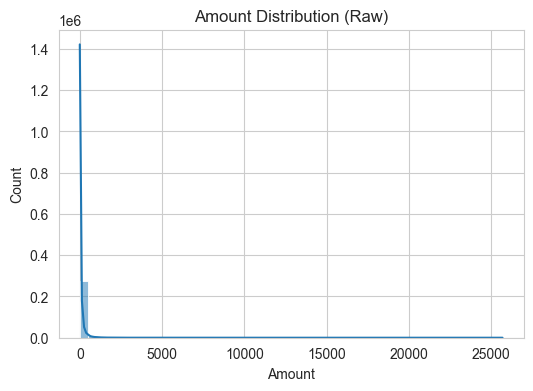

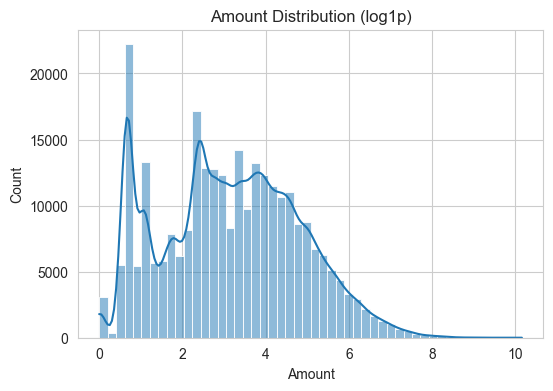

In [14]:
display(creditfraud[["Time", "Amount"]].describe().T)

plt.figure(figsize=(6,4))
sns.histplot(creditfraud["Amount"], bins=50, kde=True)
plt.title("Amount Distribution (Raw)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(np.log1p(creditfraud["Amount"]), bins=50, kde=True)
plt.title("Amount Distribution (log1p)")
plt.show()

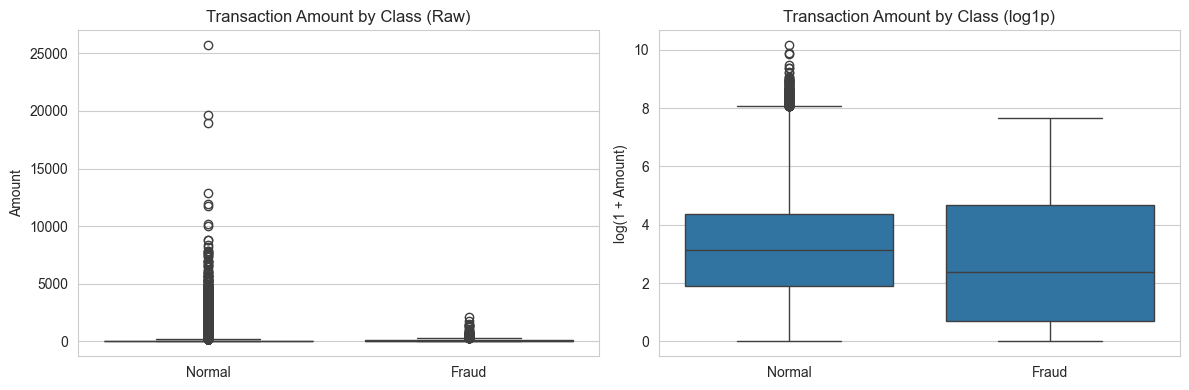

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- Left: Raw Amount by Class ---
sns.boxplot(
    x="Class",
    y="Amount",
    data=creditfraud,
    ax=axes[0]
)
axes[0].set_title("Transaction Amount by Class (Raw)")
axes[0].set_xlabel("")
axes[0].set_ylabel("Amount")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Normal", "Fraud"])

# --- Right: Log Amount by Class ---
creditfraud_tmp = creditfraud.copy()
creditfraud_tmp["Amount_log1p"] = np.log1p(creditfraud_tmp["Amount"])

sns.boxplot(
    x="Class",
    y="Amount_log1p",
    data=creditfraud_tmp,
    ax=axes[1]
)
axes[1].set_title("Transaction Amount by Class (log1p)")
axes[1].set_xlabel("")
axes[1].set_ylabel("log(1 + Amount)")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Normal", "Fraud"])

plt.tight_layout()
plt.show()


## 9. Preprocessing and splitting the data

In [16]:
#Log-transform Amount to handles heavy-tailed outliers
creditfraud["Amount_log"] = np.log1p(creditfraud["Amount"])
creditfraud = creditfraud.drop(columns=["Amount"])

In [17]:
##suffling because time is ordered 
creditfraud = creditfraud.sample(frac=1, random_state=42).reset_index(drop=True)

In [18]:
X = creditfraud.drop(columns=["Class"]).values.astype(np.float32)
y = creditfraud["Class"].values.astype(np.int64)

In [19]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.20,
    random_state=42,
    stratify=y_trainval
)


In [20]:
# Robust scaling 
scaler = RobustScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

print("Train:", X_train_s.shape, "Class counts:", np.bincount(y_train))
print("Val  :", X_val_s.shape,   "Class counts:", np.bincount(y_val))
print("Test :", X_test_s.shape,  "Class counts:", np.bincount(y_test))


Train: (181584, 30) Class counts: [181282    302]
Val  : (45396, 30) Class counts: [45320    76]
Test : (56746, 30) Class counts: [56651    95]


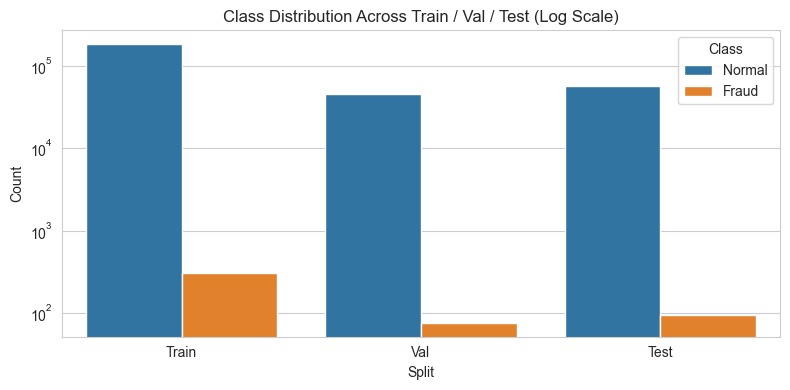

In [21]:
split_data = {
    "Train": y_train,
    "Val": y_val,
    "Test": y_test
}

plot_df = []
for name, y in split_data.items():
    counts = np.bincount(y)
    plot_df.append([name, "Normal", counts[0]])
    plot_df.append([name, "Fraud", counts[1]])

plot_df = pd.DataFrame(plot_df, columns=["Split", "Class", "Count"])

plt.figure(figsize=(8,4))
sns.barplot(data=plot_df, x="Split", y="Count", hue="Class")
plt.yscale("log")   
plt.title("Class Distribution Across Train / Val / Test (Log Scale)")
plt.tight_layout()
plt.show()

# GAN implementations

##  Preparing Minority Class(Fraud) Vanilla loader 

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
X_fraud = X_train_s[y_train == 1]         
X_fraud_t = torch.tensor(X_fraud, dtype=torch.float32)

batch_size = 128
loader = DataLoader(
    TensorDataset(X_fraud_t),
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

feat_dim = X_train_s.shape[1]              
z_dim = 64    

##  Vanilla GAN Implementation

### Discriminator (MLP)

In [24]:
class Discriminator(nn.Module):
    def __init__(self, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feat_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 1) 
        )

    def forward(self, x):
        return self.net(x)

### Generator (MLP)

In [25]:
class Generator(nn.Module):
    def __init__(self, z_dim, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, feat_dim)  
        )

    def forward(self, z):
        return self.net(z)

In [26]:
VanillaD = Discriminator(feat_dim).to(device)
VanillaG = Generator(z_dim, feat_dim).to(device)

In [27]:
criterion = nn.BCEWithLogitsLoss()
optD_vanilla = optim.Adam(VanillaD.parameters(), lr=2e-4, betas=(0.5, 0.999))
optG_vanilla = optim.Adam(VanillaG.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [28]:
def real_targets(n):
    return torch.ones(n, 1, device=device)
def fake_targets(n):
    return torch.zeros(n, 1, device=device)
def noise(n):
    return torch.randn(n, z_dim, device=device)

## Training Vanilla GAN

In [29]:
EPOCHS = 300

for epoch in range(1, EPOCHS + 1):
    for (real_x,) in loader:
        real_x = real_x.to(device)
        B = real_x.size(0)

        # ---- Train Discriminator ----
        optD_vanilla.zero_grad(set_to_none=True)

        real_logits = VanillaD(real_x)
        d_real = criterion(real_logits, real_targets(B))

        fake_x = VanillaG(noise(B)).detach()
        fake_logits = VanillaD(fake_x)
        d_fake = criterion(fake_logits, fake_targets(B))

        d_loss = d_real + d_fake
        d_loss.backward()
        optD_vanilla.step()

        # ---- Train Generator ----
        optG_vanilla.zero_grad(set_to_none=True)

        gen_x = VanillaG(noise(B))
        gen_logits = VanillaD(gen_x)
        g_loss = criterion(gen_logits, real_targets(B))

        g_loss.backward()
        optG_vanilla.step()

    if epoch % 25 == 0:
        with torch.no_grad():
            dx = torch.sigmoid(real_logits).mean().item()
            dgz = torch.sigmoid(fake_logits).mean().item()

        print(f"[VanillaGAN] Epoch {epoch}/{EPOCHS} | "
              f"D_loss={d_loss.item():.4f} | G_loss={g_loss.item():.4f} | "
              f"D(x)={dx:.3f} | D(G(z))={dgz:.3f}")


[VanillaGAN] Epoch 25/300 | D_loss=0.9660 | G_loss=0.6601 | D(x)=0.825 | D(G(z))=0.529
[VanillaGAN] Epoch 50/300 | D_loss=0.8765 | G_loss=0.8586 | D(x)=0.780 | D(G(z))=0.453
[VanillaGAN] Epoch 75/300 | D_loss=0.7793 | G_loss=1.1061 | D(x)=0.762 | D(G(z))=0.366
[VanillaGAN] Epoch 100/300 | D_loss=0.6973 | G_loss=1.3077 | D(x)=0.808 | D(G(z))=0.351
[VanillaGAN] Epoch 125/300 | D_loss=0.5365 | G_loss=1.6812 | D(x)=0.828 | D(G(z))=0.251
[VanillaGAN] Epoch 150/300 | D_loss=0.5823 | G_loss=1.6865 | D(x)=0.821 | D(G(z))=0.264
[VanillaGAN] Epoch 175/300 | D_loss=0.5586 | G_loss=1.8048 | D(x)=0.813 | D(G(z))=0.233
[VanillaGAN] Epoch 200/300 | D_loss=0.5333 | G_loss=1.9253 | D(x)=0.829 | D(G(z))=0.220
[VanillaGAN] Epoch 225/300 | D_loss=0.6312 | G_loss=2.0576 | D(x)=0.795 | D(G(z))=0.195
[VanillaGAN] Epoch 250/300 | D_loss=0.5937 | G_loss=1.8318 | D(x)=0.818 | D(G(z))=0.247
[VanillaGAN] Epoch 275/300 | D_loss=0.7643 | G_loss=2.0605 | D(x)=0.769 | D(G(z))=0.240
[VanillaGAN] Epoch 300/300 | D_loss

##  Generating fraud samples to balance the training dataset

In [30]:
n_normal = np.sum(y_train == 0)
n_fraud  = np.sum(y_train == 1)
n_to_generate = n_normal - n_fraud

print("Normal:", n_normal)
print("Fraud:", n_fraud)
print("Fraud samples to generate:", n_to_generate)


Normal: 181282
Fraud: 302
Fraud samples to generate: 180980


In [31]:
VanillaG.eval()
with torch.no_grad():
    z = torch.randn(n_to_generate, z_dim, device=device)
    X_fake_fraud_vanilla = VanillaG(z).cpu().numpy().astype(np.float32)
VanillaG.train()

print("Fake fraud generated (Vanilla GAN):", X_fake_fraud_vanilla.shape)

Fake fraud generated (Vanilla GAN): (180980, 30)


## Build Vanilla-Balanced Training Set

In [32]:
X_train_vanilla_bal = np.vstack([X_train_s, X_fake_fraud_vanilla]).astype(np.float32)
y_train_vanilla_bal = np.concatenate([
    y_train,
    np.ones(n_to_generate, dtype=np.int64)
])

print("Vanilla-balanced train:", X_train_vanilla_bal.shape)
print("Vanilla-balanced class counts:", np.bincount(y_train_vanilla_bal))

Vanilla-balanced train: (362564, 30)
Vanilla-balanced class counts: [181282 181282]


In [33]:
perm = np.random.RandomState(42).permutation(len(y_train_vanilla_bal))
X_train_vanilla_bal = X_train_vanilla_bal[perm]
y_train_vanilla_bal = y_train_vanilla_bal[perm]

In [34]:
feature_names = creditfraud.drop(columns=["Class"]).columns.tolist()

##  Synthetic fraud rows example

In [35]:
real_fraud = X_train_s[y_train == 1]

df_fake_preview = pd.DataFrame(X_fake_fraud_vanilla[:5], columns=feature_names)
df_real_preview = pd.DataFrame(real_fraud[:5], columns=feature_names)

print("==== FAKE FRAUD (Vanilla GAN) - first 5 rows (scaled space) ====")
display(df_fake_preview)

print("==== REAL FRAUD - first 5 rows (scaled space) ====")
display(df_real_preview)

==== FAKE FRAUD (Vanilla GAN) - first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.463783,0.004521,2.047815,-3.076808,2.155271,-0.190921,-1.264514,0.123177,-0.635980,-2.479066,...,0.141513,0.328510,-0.246339,-1.473766,0.310087,0.838458,-1.347045,3.149217,1.454108,0.242054
1,0.488752,0.109879,1.655250,-2.212796,1.388500,-0.611897,-0.826471,-0.014084,-0.524077,-1.853467,...,0.249892,0.328081,-0.078326,-0.879567,0.307285,0.586401,-0.830843,2.227872,0.725316,0.186537
2,0.466458,-0.690918,1.783148,-2.558172,1.653494,-0.929845,-1.345787,-0.881322,0.153154,-2.054741,...,0.086162,0.780861,-0.091157,-0.798209,-0.160351,0.970670,-1.032603,2.457097,0.589306,0.054300
3,0.802118,-0.931706,2.575675,-3.009526,2.319309,-0.588111,-1.961424,-0.712137,0.426928,-2.858953,...,0.348756,0.895478,-0.185887,-1.128107,0.390853,1.055562,-1.530491,2.570835,0.990088,0.177800
4,1.423622,-1.309061,3.654131,-4.923864,2.947370,-1.704619,-2.570253,-1.334002,0.524826,-3.943464,...,0.239978,1.120928,-0.233494,-1.563967,0.342428,1.318574,-1.663749,4.054084,1.177257,0.134187


==== REAL FRAUD - first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-0.302973,-1.974912,2.289689,-1.700566,2.144912,-1.447695,-0.812107,-2.986395,-2.130815,-1.551943,...,-0.230305,5.077457,-0.933136,-1.029725,0.148282,-0.015607,-0.777444,-9.541904,-7.667214,0.285755
1,0.896848,-0.389722,1.900014,-3.329946,1.919953,-2.495219,-1.473471,-3.364876,2.812251,-2.012443,...,1.108111,2.783944,0.745199,0.679778,-0.007146,-0.006907,1.156614,0.842428,-1.392764,0.694266
2,-0.344243,-2.770833,1.005072,-3.670141,3.254260,-2.253118,-1.304438,-5.869897,4.880253,-2.864668,...,-0.660750,2.629826,0.110042,1.940482,-0.769241,0.848062,0.019254,5.886450,1.127257,-1.023103
3,-0.905734,0.138334,2.610297,-3.109104,3.820211,1.321543,-1.840637,-0.760159,0.207431,-1.742786,...,0.963551,0.448334,-0.617341,-1.743949,-0.955735,2.095897,1.074710,3.278943,2.999603,-0.987198
4,0.722023,0.397924,1.992388,-3.041990,3.777085,0.207297,-1.820776,-1.657291,0.593265,-2.231001,...,0.882709,1.052709,-0.378974,-0.221422,-0.264320,0.671625,0.466070,4.011668,2.662096,-0.952365


##  Generated Fraud data quality check

In [36]:
df_fake = pd.DataFrame(X_fake_fraud_vanilla, columns=feature_names)
df_real = pd.DataFrame(real_fraud, columns=feature_names)

summary_vanilla = pd.DataFrame({
    "real_mean": df_real.mean(),
    "fake_mean": df_fake.mean(),
    "real_std":  df_real.std(),
    "fake_std":  df_fake.std(),
    "real_min":  df_real.min(),
    "fake_min":  df_fake.min(),
    "real_max":  df_real.max(),
    "fake_max":  df_fake.max(),
})

display(summary_vanilla.head(12))

,real_mean,fake_mean,real_std,fake_std,real_min,fake_min,real_max,fake_max
Time,-0.050305,0.944607,0.566135,0.345726,-0.989627,-0.221380,1.007964,3.008357
V1,-2.002661,-1.258845,2.970658,0.925181,-13.706331,-6.293758,0.946541,0.961488
V2,2.329283,2.681444,2.935278,0.793045,-5.373646,0.210187,15.732089,6.558491
V3,-3.583599,-3.254872,3.631098,1.079403,-16.328098,-9.188919,1.079881,-0.057665
V4,2.777129,2.155707,1.834819,0.779148,-0.773399,-0.078768,7.483925,6.406217
V5,-2.244557,-1.328996,4.004562,0.824377,-16.937778,-6.378970,4.801641,0.595599
V6,-0.949337,-2.073608,1.448174,0.665156,-5.259755,-5.711588,5.788529,-0.150353
V7,-4.455743,-1.376680,6.152528,1.252494,-38.863022,-8.508562,5.136919,1.648575
V8,1.823116,0.361634,9.791509,0.719157,-77.124695,-2.118039,37.531563,4.170285
V9,-1.942928,-2.953144,2.004648,0.888442,-10.696374,-7.863327,2.746032,-0.221395


In [37]:
print("NaN values:", np.isnan(X_fake_fraud_vanilla).sum())
print("Inf values:", np.isinf(X_fake_fraud_vanilla).sum())

nan_per_feature = np.isnan(X_fake_fraud_vanilla).sum(axis=0)
if nan_per_feature.sum() == 0:
    print("No NaNs in any feature.")
else:
    print("NaNs per feature:")
    display(pd.Series(nan_per_feature, index=feature_names))

print("\nGenerated data ranges:")
print("Min:", X_fake_fraud_vanilla.min())
print("Max:", X_fake_fraud_vanilla.max())
print("Mean:", X_fake_fraud_vanilla.mean())
print("Std :", X_fake_fraud_vanilla.std())


NaN values: 0
Inf values: 0
No NaNs in any feature.

Generated data ranges:
Min: -21.28337
Max: 9.466343
Mean: -0.8489353
Std : 2.4327526


## Class Distribution After Vanilla GAN Balancing

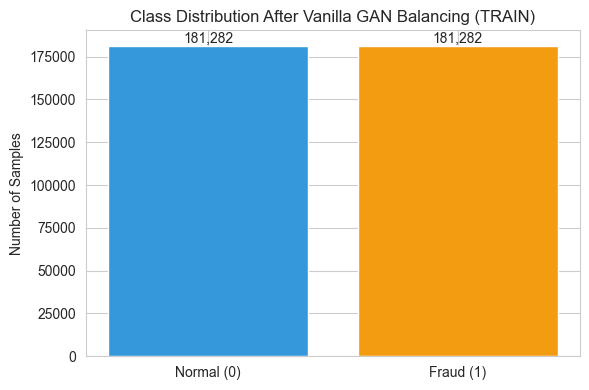

In [38]:
normal_after = np.sum(y_train_vanilla_bal == 0)
fraud_after  = np.sum(y_train_vanilla_bal == 1)

plt.figure(figsize=(6,4))
plt.bar(
    ["Normal (0)", "Fraud (1)"],
    [normal_after, fraud_after],
    color=["#3498DB", "#F39C12"]
)

plt.ylabel("Number of Samples")
plt.title("Class Distribution After Vanilla GAN Balancing (TRAIN)")

plt.text(0, normal_after, f"{normal_after:,}", ha="center", va="bottom")
plt.text(1, fraud_after,  f"{fraud_after:,}",  ha="center", va="bottom")

plt.tight_layout()
plt.show()

## WGAN-GP(Wasserstein GAN with Gradient Penalty) Implementation

##  Preparing Minority Class(Fraud) WGAN-GP loader

In [39]:
wgan_loader = DataLoader(
    TensorDataset(X_fraud_t),
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

feat_dim = X_train_s.shape[1]
z_dim = 64
print("feat_dim:", feat_dim, "| fraud train samples:", len(X_fraud))

feat_dim: 30 | fraud train samples: 302


## Critic (Wasserstein Discriminator) Implementation 

In [40]:
class WGANCritic(nn.Module):
    def __init__(self, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feat_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1)   
        )
    def forward(self, x):
        return self.net(x)

## Generator Implementation

In [41]:
class WGANGenerator(nn.Module):
    def __init__(self, z_dim, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, feat_dim)  
        )
    def forward(self, z):
        return self.net(z)

## Gradient Penalty (Lipschitz Constraint) Implementation

In [42]:
def gradient_penalty(critic, real, fake, device):
    B = real.size(0)
    eps = torch.rand(B, 1, device=device)
    eps = eps.expand_as(real)

    x_hat = eps * real + (1 - eps) * fake
    x_hat.requires_grad_(True)

    scores = critic(x_hat)  
    grads = torch.autograd.grad(
        outputs=scores,
        inputs=x_hat,
        grad_outputs=torch.ones_like(scores),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    grads = grads.view(B, -1)
    gp = ((grads.norm(2, dim=1) - 1.0) ** 2).mean()
    return gp


In [43]:
WGAND = WGANCritic(feat_dim).to(device)
WGANG = WGANGenerator(z_dim, feat_dim).to(device)

In [44]:
lr = 1e-4
beta1, beta2 = 0.0, 0.9
optD_wgan = optim.Adam(WGAND.parameters(), lr=lr, betas=(beta1, beta2))
optG_wgan = optim.Adam(WGANG.parameters(), lr=lr, betas=(beta1, beta2))

## Training  WGAN-GP

In [45]:
lambda_gp = 10.0
n_critic = 5
EPOCHS = 300

for epoch in range(1, EPOCHS + 1):
    for i, (real_x,) in enumerate(wgan_loader, start=1):
        real_x = real_x.to(device)
        B = real_x.size(0)

        ## Train Critic
        for _ in range(n_critic):
            z = noise(B)
            fake_x = WGANG(z).detach()

            d_real = WGAND(real_x).mean()
            d_fake = WGAND(fake_x).mean()

            gp = gradient_penalty(WGAND, real_x, fake_x, device)
            d_loss = (d_fake - d_real) + lambda_gp * gp  

            optD_wgan.zero_grad(set_to_none=True)
            d_loss.backward()
            optD_wgan.step()

        # Train Generator
        z = noise(B)
        gen_x = WGANG(z)
        g_loss = -WGAND(gen_x).mean()  

        optG_wgan.zero_grad(set_to_none=True)
        g_loss.backward()
        optG_wgan.step()

    if epoch % 25 == 0:
        with torch.no_grad():
            z = noise(B)
            fake_x = WGANG(z)
            wass = WGAND(real_x).mean().item() - WGAND(fake_x).mean().item()
        print(f"[WGAN-GP] Epoch {epoch}/{EPOCHS} | "
              f"D_loss={d_loss.item():.4f} | G_loss={g_loss.item():.4f} | "
              f"GP={gp.item():.4f} | Wass~={wass:.4f}")


[WGAN-GP] Epoch 25/300 | D_loss=-26.3967 | G_loss=-2.7877 | GP=0.6730 | Wass~=33.2972
[WGAN-GP] Epoch 50/300 | D_loss=-27.5582 | G_loss=-5.0571 | GP=0.8220 | Wass~=35.7019
[WGAN-GP] Epoch 75/300 | D_loss=-25.6024 | G_loss=-7.2874 | GP=0.8237 | Wass~=33.6933
[WGAN-GP] Epoch 100/300 | D_loss=-18.2206 | G_loss=-6.5736 | GP=0.5878 | Wass~=23.9302
[WGAN-GP] Epoch 125/300 | D_loss=-18.4879 | G_loss=-4.6888 | GP=0.5144 | Wass~=23.6517
[WGAN-GP] Epoch 150/300 | D_loss=-15.6417 | G_loss=-1.8022 | GP=0.4385 | Wass~=20.0003
[WGAN-GP] Epoch 175/300 | D_loss=-17.7407 | G_loss=-1.3202 | GP=0.4769 | Wass~=22.5547
[WGAN-GP] Epoch 200/300 | D_loss=-16.4076 | G_loss=-1.8689 | GP=0.4111 | Wass~=20.4677
[WGAN-GP] Epoch 225/300 | D_loss=-13.8980 | G_loss=-2.7241 | GP=0.4049 | Wass~=17.6994
[WGAN-GP] Epoch 250/300 | D_loss=-16.7995 | G_loss=-4.0606 | GP=0.3673 | Wass~=20.5341
[WGAN-GP] Epoch 275/300 | D_loss=-12.7458 | G_loss=-4.7802 | GP=0.2975 | Wass~=15.2349
[WGAN-GP] Epoch 300/300 | D_loss=-11.7287 | G_

## Generating fraud samples to balance the training dataset

In [46]:
n_normal = np.sum(y_train == 0)
n_fraud  = np.sum(y_train == 1)
n_to_generate = n_normal - n_fraud

print("Normal:", n_normal)
print("Fraud :", n_fraud)
print("Need to generate:", n_to_generate)

Normal: 181282
Fraud : 302
Need to generate: 180980


In [47]:
WGANG.eval()
with torch.no_grad():
    z = torch.randn(n_to_generate, z_dim, device=device)
    X_fake_fraud_wgan = WGANG(z).cpu().numpy().astype(np.float32)
WGANG.train()

print("Fake fraud (WGAN) shape:", X_fake_fraud_wgan.shape)

Fake fraud (WGAN) shape: (180980, 30)


## Building the WGAN-Balanced Training Set

In [48]:
X_train_wgan_bal = np.vstack([X_train_s, X_fake_fraud_wgan]).astype(np.float32)
y_train_wgan_bal = np.concatenate([y_train, np.ones(n_to_generate, dtype=np.int64)])

perm = np.random.RandomState(42).permutation(len(y_train_wgan_bal))
X_train_wgan_bal = X_train_wgan_bal[perm]
y_train_wgan_bal = y_train_wgan_bal[perm]

print("Balanced TRAIN (WGAN):", X_train_wgan_bal.shape)
print("Counts:", np.bincount(y_train_wgan_bal))

Balanced TRAIN (WGAN): (362564, 30)
Counts: [181282 181282]


##  Synthetic fraud rows example

In [49]:
real_fraud = X_train_s[y_train == 1]

df_fake_preview_wgan = pd.DataFrame(X_fake_fraud_wgan[:5], columns=feature_names)
df_real_preview = pd.DataFrame(real_fraud[:5], columns=feature_names)

print("==== FAKE FRAUD (WGAN-GP) — first 5 rows (scaled space) ====")
display(df_fake_preview_wgan)

print("==== REAL FRAUD — first 5 rows (scaled space) ====")
display(df_real_preview)


==== FAKE FRAUD (WGAN-GP) — first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-0.331809,-3.493893,3.747186,-5.745718,3.118732,-3.573433,-1.519571,-6.282854,5.156950,-2.287577,...,2.318882,1.197606,0.239525,0.052512,-0.346451,0.006946,0.376087,4.026534,1.439051,-0.711382
1,0.129185,-1.386776,0.789325,-1.605813,1.809296,-1.762698,-0.107188,-3.080119,3.306684,-1.433385,...,-0.219611,3.601468,-0.380249,-1.627433,0.298601,-0.033614,0.198152,-0.201449,-1.371716,1.030392
2,-0.099762,-1.129274,0.630084,-2.142265,2.034606,-1.388336,-0.818257,-3.350545,3.139929,-1.214565,...,-0.357556,2.510279,0.054821,-1.145029,0.169000,-0.695509,0.109333,0.101858,-1.203957,0.301597
3,-0.339302,-1.704015,2.534148,-3.783882,2.773828,-3.259084,-0.836146,-5.297043,3.235386,-2.501494,...,1.751000,1.601180,0.449968,0.725086,-0.160756,-0.073213,0.723243,2.598777,1.591422,0.196236
4,0.219102,-2.542452,1.644755,-2.571228,2.549278,-2.062573,-0.620962,-5.229233,1.122496,-1.633622,...,1.109008,1.781370,0.341507,-0.500507,0.281669,0.106868,0.180657,-1.571352,-1.085910,0.593199


==== REAL FRAUD — first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-0.302973,-1.974912,2.289689,-1.700566,2.144912,-1.447695,-0.812107,-2.986395,-2.130815,-1.551943,...,-0.230305,5.077457,-0.933136,-1.029725,0.148282,-0.015607,-0.777444,-9.541904,-7.667214,0.285755
1,0.896848,-0.389722,1.900014,-3.329946,1.919953,-2.495219,-1.473471,-3.364876,2.812251,-2.012443,...,1.108111,2.783944,0.745199,0.679778,-0.007146,-0.006907,1.156614,0.842428,-1.392764,0.694266
2,-0.344243,-2.770833,1.005072,-3.670141,3.254260,-2.253118,-1.304438,-5.869897,4.880253,-2.864668,...,-0.660750,2.629826,0.110042,1.940482,-0.769241,0.848062,0.019254,5.886450,1.127257,-1.023103
3,-0.905734,0.138334,2.610297,-3.109104,3.820211,1.321543,-1.840637,-0.760159,0.207431,-1.742786,...,0.963551,0.448334,-0.617341,-1.743949,-0.955735,2.095897,1.074710,3.278943,2.999603,-0.987198
4,0.722023,0.397924,1.992388,-3.041990,3.777085,0.207297,-1.820776,-1.657291,0.593265,-2.231001,...,0.882709,1.052709,-0.378974,-0.221422,-0.264320,0.671625,0.466070,4.011668,2.662096,-0.952365


## Statistical comparison 

In [50]:
df_fake_wgan = pd.DataFrame(X_fake_fraud_wgan, columns=feature_names)
df_real = pd.DataFrame(real_fraud, columns=feature_names)

summary_wgan = pd.DataFrame({
    "real_mean": df_real.mean(),
    "fake_mean": df_fake_wgan.mean(),
    "real_std":  df_real.std(),
    "fake_std":  df_fake_wgan.std(),
    "real_min":  df_real.min(),
    "fake_min":  df_fake_wgan.min(),
    "real_max":  df_real.max(),
    "fake_max":  df_fake_wgan.max(),
})

summary_wgan["mean_abs_diff"] = (summary_wgan["real_mean"] - summary_wgan["fake_mean"]).abs()
summary_wgan["std_abs_diff"]  = (summary_wgan["real_std"]  - summary_wgan["fake_std"]).abs()

print("Top 10 features where WGAN fake differs most (by mean):")
display(summary_wgan.sort_values("mean_abs_diff", ascending=False).head(10))


Top 10 features where WGAN fake differs most (by mean):


,real_mean,fake_mean,real_std,fake_std,real_min,fake_min,real_max,fake_max,mean_abs_diff,std_abs_diff
V8,1.823116,3.145030,9.791509,2.602668,-77.124695,-5.199536,37.531563,17.578941,1.321914,7.188840
V14,-7.415919,-6.413493,4.523962,1.544475,-20.590504,-16.267481,1.660035,-1.601999,1.002426,2.979487
V17,-7.016817,-7.834049,7.789845,1.804930,-28.422729,-17.827253,7.560897,-1.737534,0.817232,5.984916
V27,1.407490,1.874711,7.819185,2.793360,-45.037224,-8.977509,18.912291,16.295925,0.467220,5.025825
V4,2.777129,2.351053,1.834819,0.501035,-0.773399,0.697362,7.483925,5.149578,0.426076,1.333784
V12,-5.944183,-5.527071,4.417323,1.369941,-18.161179,-13.071417,1.209942,-0.970831,0.417113,3.047382
V5,-2.244557,-2.593879,4.004562,1.447726,-16.937778,-10.157935,4.801641,1.692244,0.349322,2.556836
V18,-2.074012,-2.379171,2.887136,0.954242,-9.494764,-7.726658,3.790396,0.643897,0.305159,1.932894
V11,2.443392,2.204341,1.772040,0.661884,-1.042246,0.125540,7.755225,5.849670,0.239051,1.110156
V21,0.987627,1.203265,5.811708,2.174872,-54.901089,-7.565392,24.198105,11.286995,0.215639,3.636836


## Quality check on generated samples

In [51]:
print("NaNs in WGAN fake:", np.isnan(X_fake_fraud_wgan).sum())
print("Infs in WGAN fake:", np.isinf(X_fake_fraud_wgan).sum())


NaNs in WGAN fake: 0
Infs in WGAN fake: 0


## Class Distribution After WGAN-GP Balancing

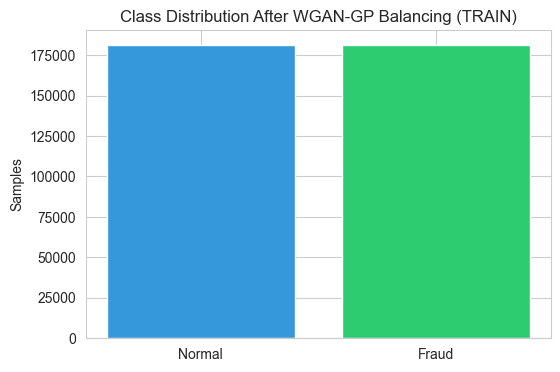

In [52]:
plt.figure(figsize=(6,4))
plt.bar(["Normal", "Fraud"], 
        [np.sum(y_train_wgan_bal == 0), np.sum(y_train_wgan_bal == 1)],
        color=["#3498DB", "#2ECC71"])
plt.title("Class Distribution After WGAN-GP Balancing (TRAIN)")
plt.ylabel("Samples")
plt.show()


## CGAN (Conditional GAN) Implementation

##  Preparing Minority Class(Fraud) CGAN loader

In [53]:
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)

batch_size = 256
cgan_loader = DataLoader(
    TensorDataset(X_train_t, y_train_t),
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

feat_dim = X_train_s.shape[1]
z_dim = 64
n_classes = 2

## Generator (Conditioned on Class Label) Implementation

In [54]:
class CGAN_Generator(nn.Module):
    def __init__(self, z_dim, feat_dim, n_classes, emb_dim=8):
        super().__init__()
        self.label_emb = nn.Embedding(n_classes, emb_dim)
        self.net = nn.Sequential(
            nn.Linear(z_dim + emb_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, feat_dim)   
        )

    def forward(self, z, y):
        y_e = self.label_emb(y)
        x = torch.cat([z, y_e], dim=1)
        return self.net(x)

## Discriminator (Conditioned on Class Label) Implementation 

In [55]:
class CGAN_Discriminator(nn.Module):
    def __init__(self, feat_dim, n_classes, emb_dim=8):
        super().__init__()
        self.label_emb = nn.Embedding(n_classes, emb_dim)
        self.net = nn.Sequential(
            nn.Linear(feat_dim + emb_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  
        )

    def forward(self, x, y):
        y_e = self.label_emb(y)
        inp = torch.cat([x, y_e], dim=1)
        return self.net(inp)

In [56]:
CGAND = CGAN_Discriminator(feat_dim, n_classes).to(device)
CGANG = CGAN_Generator(z_dim, feat_dim, n_classes).to(device)

In [57]:
criterion = nn.BCEWithLogitsLoss()
optD_cgan = optim.Adam(CGAND.parameters(), lr=2e-4, betas=(0.5, 0.999))
optG_cgan = optim.Adam(CGANG.parameters(), lr=2e-4, betas=(0.5, 0.999))

## Training CGAN 

In [58]:
EPOCHS = 300

for epoch in range(1, EPOCHS + 1):
    for real_x, real_y in cgan_loader:
        real_x = real_x.to(device)
        real_y = real_y.to(device)
        B = real_x.size(0)
        
        # Discriminator training
        optD_cgan.zero_grad(set_to_none=True)

        real_logits = CGAND(real_x, real_y)
        d_real = criterion(real_logits, real_targets(B))

        z = noise(B)
        fake_y = torch.bernoulli(0.5 * torch.ones(B, device=device)).long()
        fake_x = CGANG(z, fake_y).detach()

        fake_logits = CGAND(fake_x, fake_y)
        d_fake = criterion(fake_logits, fake_targets(B))

        d_loss = d_real + d_fake
        d_loss.backward()
        optD_cgan.step()

        # Generator training
        
        optG_cgan.zero_grad(set_to_none=True)

        z = noise(B)
        gen_y = torch.bernoulli(0.5 * torch.ones(B, device=device)).long()
        gen_x = CGANG(z, gen_y)

        gen_logits = CGAND(gen_x, gen_y)
        g_loss = criterion(gen_logits, real_targets(B))

        g_loss.backward()
        optG_cgan.step()

    if epoch % 25 == 0:
        with torch.no_grad():
            dx = torch.sigmoid(real_logits).mean().item()
            dgz = torch.sigmoid(fake_logits).mean().item()
        print(f"[CGAN] Epoch {epoch}/{EPOCHS} | D_loss={d_loss.item():.4f} | G_loss={g_loss.item():.4f} | "
              f"D(x)={dx:.3f} | D(G(z))={dgz:.3f}")


[CGAN] Epoch 25/300 | D_loss=0.3223 | G_loss=4.9032 | D(x)=0.887 | D(G(z))=0.115
[CGAN] Epoch 50/300 | D_loss=0.3864 | G_loss=5.1368 | D(x)=0.873 | D(G(z))=0.116
[CGAN] Epoch 75/300 | D_loss=0.3374 | G_loss=6.3796 | D(x)=0.895 | D(G(z))=0.113
[CGAN] Epoch 100/300 | D_loss=0.3251 | G_loss=6.3395 | D(x)=0.878 | D(G(z))=0.082
[CGAN] Epoch 125/300 | D_loss=0.2422 | G_loss=8.1825 | D(x)=0.928 | D(G(z))=0.082
[CGAN] Epoch 150/300 | D_loss=0.2444 | G_loss=7.5410 | D(x)=0.911 | D(G(z))=0.069
[CGAN] Epoch 175/300 | D_loss=0.3136 | G_loss=6.8316 | D(x)=0.900 | D(G(z))=0.096
[CGAN] Epoch 200/300 | D_loss=0.2427 | G_loss=8.6839 | D(x)=0.942 | D(G(z))=0.053
[CGAN] Epoch 225/300 | D_loss=0.1579 | G_loss=8.3327 | D(x)=0.940 | D(G(z))=0.041
[CGAN] Epoch 250/300 | D_loss=0.1863 | G_loss=7.1430 | D(x)=0.954 | D(G(z))=0.083
[CGAN] Epoch 275/300 | D_loss=0.2267 | G_loss=7.8242 | D(x)=0.932 | D(G(z))=0.056
[CGAN] Epoch 300/300 | D_loss=0.1519 | G_loss=21.0934 | D(x)=0.949 | D(G(z))=0.046


## Generating fraud samples to balance the training dataset

In [59]:
n_normal = np.sum(y_train == 0)
n_fraud  = np.sum(y_train == 1)
n_to_generate = n_normal - n_fraud

print("Normal:", n_normal)
print("Fraud:", n_fraud)
print("Fraud samples to generate:", n_to_generate)

Normal: 181282
Fraud: 302
Fraud samples to generate: 180980


In [60]:
CGANG.eval()
with torch.no_grad():
    z = torch.randn(n_to_generate, z_dim, device=device)
    y_fraud = torch.ones(n_to_generate, dtype=torch.long, device=device)  
    X_fake_fraud_cgan = CGANG(z, y_fraud).cpu().numpy().astype(np.float32)
CGANG.train()

print("Fake fraud generated (CGAN):", X_fake_fraud_cgan.shape)

Fake fraud generated (CGAN): (180980, 30)


## Building CGAN-Balanced Training Set

In [61]:
X_train_bal_cgan = np.vstack([X_train_s, X_fake_fraud_cgan]).astype(np.float32)
y_train_bal_cgan = np.concatenate([y_train, np.ones(n_to_generate, dtype=np.int64)])

perm = np.random.RandomState(42).permutation(len(y_train_bal_cgan))
X_train_bal_cgan = X_train_bal_cgan[perm]
y_train_bal_cgan = y_train_bal_cgan[perm]

print("Balanced TRAIN (CGAN):", X_train_bal_cgan.shape)
print("Counts:", np.bincount(y_train_bal_cgan))

Balanced TRAIN (CGAN): (362564, 30)
Counts: [181282 181282]


##  Synthetic fraud rows example

In [62]:
real_fraud = X_train_s[y_train == 1]

df_fake_preview = pd.DataFrame(X_fake_fraud_cgan[:5], columns=feature_names)
df_real_preview = pd.DataFrame(real_fraud[:5], columns=feature_names)

print("==== FAKE FRAUD (CGAN) - first 5 rows (scaled space) ====")
display(df_fake_preview)

print("==== REAL FRAUD - first 5 rows (scaled space) ====")
display(df_real_preview)


==== FAKE FRAUD (CGAN) - first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,0.227098,1.233437,-0.166695,-1.671932,0.960490,-0.713580,-1.499798,0.668628,-0.612490,0.261117,...,-0.517684,-0.435692,0.583946,1.318742,2.928401,-0.311616,0.274572,0.632771,0.412286,-0.874976
1,0.195501,1.526864,-0.099213,-2.210153,0.975310,0.512261,-1.423173,0.956348,-1.269690,0.090858,...,-0.753474,-0.758929,0.567554,0.916624,2.029323,-0.234545,-0.318100,0.331677,0.104511,-1.304740
2,0.523822,1.302577,-0.233662,-1.844197,1.114401,-0.441930,-1.478934,0.669472,-0.811698,-0.001233,...,-0.478376,-0.419666,0.575842,1.044486,2.839014,-0.150008,-0.337317,0.929115,0.720730,-0.727043
3,0.141987,1.436360,-0.155032,-2.151464,1.089632,0.172800,-1.408144,0.995371,-1.200090,-0.081414,...,-0.720767,-0.668902,0.547477,0.872296,2.335991,-0.041718,-0.275952,0.591589,0.173136,-1.230862
4,0.299174,1.287083,-0.337369,-1.856281,1.150071,-0.453050,-1.370547,0.741326,-0.827340,0.133570,...,-0.253324,-0.530646,0.304752,1.069939,2.536766,-0.318083,-0.558309,0.656339,0.472657,-0.558972


==== REAL FRAUD - first 5 rows (scaled space) ====


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_log
0,-0.302973,-1.974912,2.289689,-1.700566,2.144912,-1.447695,-0.812107,-2.986395,-2.130815,-1.551943,...,-0.230305,5.077457,-0.933136,-1.029725,0.148282,-0.015607,-0.777444,-9.541904,-7.667214,0.285755
1,0.896848,-0.389722,1.900014,-3.329946,1.919953,-2.495219,-1.473471,-3.364876,2.812251,-2.012443,...,1.108111,2.783944,0.745199,0.679778,-0.007146,-0.006907,1.156614,0.842428,-1.392764,0.694266
2,-0.344243,-2.770833,1.005072,-3.670141,3.254260,-2.253118,-1.304438,-5.869897,4.880253,-2.864668,...,-0.660750,2.629826,0.110042,1.940482,-0.769241,0.848062,0.019254,5.886450,1.127257,-1.023103
3,-0.905734,0.138334,2.610297,-3.109104,3.820211,1.321543,-1.840637,-0.760159,0.207431,-1.742786,...,0.963551,0.448334,-0.617341,-1.743949,-0.955735,2.095897,1.074710,3.278943,2.999603,-0.987198
4,0.722023,0.397924,1.992388,-3.041990,3.777085,0.207297,-1.820776,-1.657291,0.593265,-2.231001,...,0.882709,1.052709,-0.378974,-0.221422,-0.264320,0.671625,0.466070,4.011668,2.662096,-0.952365


## Statistical comparison 

In [63]:
df_fake_cgan = pd.DataFrame(X_fake_fraud_cgan, columns=feature_names)
df_real = pd.DataFrame(real_fraud, columns=feature_names)

summary_cgan = pd.DataFrame({
    "real_mean": df_real.mean(),
    "fake_mean": df_fake_cgan.mean(),
    "real_std":  df_real.std(),
    "fake_std":  df_fake_cgan.std(),
    "real_min":  df_real.min(),
    "fake_min":  df_fake_cgan.min(),
    "real_max":  df_real.max(),
    "fake_max":  df_fake_cgan.max(),
})

summary_cgan["mean_abs_diff"] = (summary_cgan["real_mean"] - summary_cgan["fake_mean"]).abs()
summary_cgan["std_abs_diff"]  = (summary_cgan["real_std"]  - summary_cgan["fake_std"]).abs()

print("Top 10 features where CGAN fake differs most (by mean):")
display(summary_cgan.sort_values("mean_abs_diff", ascending=False).head(10))

print("Top 10 features where CGAN matches real fraud best (by mean):")
display(summary_cgan.sort_values("mean_abs_diff", ascending=True).head(10))


Top 10 features where CGAN fake differs most (by mean):


,real_mean,fake_mean,real_std,fake_std,real_min,fake_min,real_max,fake_max,mean_abs_diff,std_abs_diff
V17,-7.016817,3.133723,7.789845,0.229342,-28.422729,2.092324,7.560897,4.267285,10.150539,7.560503
V12,-5.944183,0.167895,4.417323,0.332957,-18.161179,-0.960152,1.209942,1.485944,6.112079,4.084366
V7,-4.455743,0.805609,6.152528,0.130816,-38.863022,-0.180583,5.136919,1.488240,5.261352,6.021712
V10,-5.355584,-0.929316,4.616229,0.093094,-24.823103,-1.737633,2.106848,0.260765,4.426268,4.523135
V14,-7.415919,-3.447689,4.523962,0.254672,-20.590504,-4.942060,1.660035,-2.352501,3.968230,4.269290
V16,-4.002355,-0.388428,3.757283,0.138756,-13.770357,-1.063574,3.102314,0.504579,3.613927,3.618526
V1,-2.002661,1.363184,2.970658,0.083639,-13.706331,0.869993,0.946541,2.373786,3.365845,2.887019
V8,1.823116,-0.959454,9.791509,0.178837,-77.124695,-1.586539,37.531563,-0.159625,2.782570,9.612672
V24,-0.201474,2.462350,0.645773,0.227321,-2.486641,1.326079,1.202875,3.395519,2.663824,0.418452
V2,2.329283,-0.217030,2.935278,0.090747,-5.373646,-0.606856,15.732089,0.769393,2.546313,2.844531


Top 10 features where CGAN matches real fraud best (by mean):


,real_mean,fake_mean,real_std,fake_std,real_min,fake_min,real_max,fake_max,mean_abs_diff,std_abs_diff
V28,0.413722,0.416785,4.262256,0.197264,-14.343186,-1.117047,13.486363,1.589186,0.003063,4.064992
V25,0.007546,-0.184793,1.240524,0.176594,-7.188903,-1.767689,3.283206,0.664527,0.192339,1.063930
V15,-0.079541,-0.341978,0.867507,0.119971,-3.697720,-1.052653,1.969209,0.663309,0.262437,0.747537
V22,0.091425,0.424568,1.016069,0.109657,-2.622020,-0.111857,7.765849,0.997352,0.333143,0.906412
V13,-0.102062,0.267628,0.832274,0.496625,-2.371040,-1.120913,2.135525,2.576872,0.369689,0.335649
Time,-0.050305,0.382289,0.566135,0.124126,-0.989627,-1.066459,1.007964,1.202876,0.432594,0.442010
V6,-0.949337,-1.397603,1.448174,0.079466,-5.259755,-1.856710,5.788529,-1.014728,0.448266,1.368708
V26,0.124111,-0.400807,0.773989,0.114413,-1.940527,-1.477082,2.295221,0.883946,0.524917,0.659576
V27,1.407490,0.721513,7.819185,0.158182,-45.037224,-0.206575,18.912291,2.095430,0.685977,7.661003
Amount_log,-0.061427,-0.796740,0.910089,0.226041,-1.267368,-1.885117,1.829780,0.312676,0.735313,0.684048


## Quality check on generated samples

In [64]:
print("NaNs in fake:", np.isnan(X_fake_fraud_cgan).sum())
print("Infs in fake:", np.isinf(X_fake_fraud_cgan).sum())

X_fake_fraud_cgan = np.nan_to_num(X_fake_fraud_cgan, nan=0.0, posinf=0.0, neginf=0.0)


NaNs in fake: 0
Infs in fake: 0


## Class Distribution After CGAN Balancing

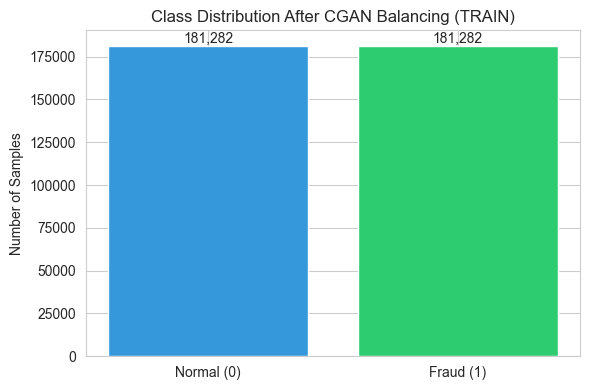

In [65]:
normal_after = np.sum(y_train_bal_cgan == 0)
fraud_after  = np.sum(y_train_bal_cgan == 1)

plt.figure(figsize=(6,4))
plt.bar(["Normal (0)", "Fraud (1)"], [normal_after, fraud_after],
        color=["#3498DB", "#2ECC71"])
plt.ylabel("Number of Samples")
plt.title("Class Distribution After CGAN Balancing (TRAIN)")
plt.text(0, normal_after, f"{normal_after:,}", ha="center", va="bottom")
plt.text(1, fraud_after,  f"{fraud_after:,}",  ha="center", va="bottom")
plt.tight_layout()
plt.show()


# Classification Model 

## Creating Loaders for classifier training

In [66]:
def make_loader(X, y, batch_size=256, shuffle=True):
    X_t = torch.tensor(X, dtype=torch.float32)
    y_t = torch.tensor(y, dtype=torch.long)
    ds = TensorDataset(X_t, y_t)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle, drop_last=False)

In [67]:
train_loader_orig = make_loader(
    X_train_s,
    y_train,
    batch_size=256,
    shuffle=True
)
train_loader_vanilla = make_loader(
    X_train_vanilla_bal,
    y_train_vanilla_bal,
    batch_size=256,
    shuffle=True
)
train_loader_wgan = make_loader(
    X_train_wgan_bal,
    y_train_wgan_bal,
    batch_size=256,
    shuffle=True
)
train_loader_cgan = make_loader(
    X_train_bal_cgan,
    y_train_bal_cgan,
    batch_size=256, 
    shuffle=True
)

## Creating Validation and Test loaders

In [68]:
val_loader  = make_loader(X_val_s,  y_val,  batch_size=512, shuffle=False)
test_loader = make_loader(X_test_s, y_test, batch_size=512, shuffle=False)

## Logistic regression classifier Implementation 

In [78]:
def run_logreg(name, X_tr, y_tr, X_te, y_te):
    logreg = LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    )
    
    logreg.fit(X_tr, y_tr)


    probs = logreg.predict_proba(X_te)[:, 1]
    preds = (probs >= 0.5).astype(int)

    roc = roc_auc_score(y_te, probs)
    pr  = average_precision_score(y_te, probs)
    cm  = confusion_matrix(y_te, preds)
    rep = classification_report(y_te, preds, digits=4, zero_division=0)

    print("\n" + "=" * 90)
    print(f"Scenario: {name}")
    print("Train class counts:", np.bincount(y_tr))
    print("Test  class counts:", np.bincount(y_te))
    print(f"ROC-AUC: {roc:.6f}")
    print(f"PR-AUC (Average Precision): {pr:.6f}")
    print("\nClassification report:\n", rep)
    print("Confusion matrix:\n", cm)

    return {
        "name": name,
        "roc_auc": roc,
        "pr_auc": pr,
        "cm": cm,
        "report": rep,
    }

## Classifier Evaluation on GAN-Balanced Data

In [79]:
def train_logreg(X_tr, y_tr, X_val=None, y_val=None, epochs=25, random_state=42):
    X_tr = np.asarray(X_tr)
    y_tr = np.asarray(y_tr)

    classes = np.array([0, 1], dtype=np.int64)

    cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_tr)
    class_weight = {0: cw[0], 1: cw[1]}

    model = SGDClassifier(
        loss="log_loss",
        penalty="l2",
        alpha=0.0001,
        learning_rate="optimal",
        random_state=random_state,
        warm_start=True
    )

    history = {"train_loss": [], "val_loss": []}

    for ep in range(epochs):
        model.partial_fit(
            X_tr,
            y_tr,
            classes=classes,
            sample_weight=np.vectorize(class_weight.get)(y_tr)
        )

        # Train loss
        p_tr = model.predict_proba(X_tr)[:, 1]
        history["train_loss"].append(log_loss(y_tr, p_tr, labels=[0, 1]))

        # Val loss 
        if X_val is not None and y_val is not None:
            X_val = np.asarray(X_val)
            y_val = np.asarray(y_val)
            p_val = model.predict_proba(X_val)[:, 1]
            history["val_loss"].append(log_loss(y_val, p_val, labels=[0, 1]))

    return model, history


In [80]:
results = []
scenarios = [
    ("Original (Imbalanced)", X_train_s,          y_train),
    ("VanillaGAN-balanced",   X_train_vanilla_bal, y_train_vanilla_bal),
    ("WGAN-GP-balanced",      X_train_wgan_bal,    y_train_wgan_bal),
    ("CGAN-balanced",         X_train_bal_cgan,    y_train_bal_cgan),
]

for name, X_tr, y_tr in scenarios:
    results.append(run_logreg(name, X_tr, y_tr, X_test_s, y_test))


Scenario: Original (Imbalanced)
Train class counts: [181282    302]
Test  class counts: [56651    95]
ROC-AUC: 0.980755
PR-AUC (Average Precision): 0.668344

Classification report:
               precision    recall  f1-score   support

           0     0.9999    0.9780    0.9888     56651
           1     0.0654    0.9158    0.1220        95

    accuracy                         0.9779     56746
   macro avg     0.5326    0.9469    0.5554     56746
weighted avg     0.9983    0.9779    0.9874     56746

Confusion matrix:
 [[55407  1244]
 [    8    87]]

Scenario: VanillaGAN-balanced
Train class counts: [181282 181282]
Test  class counts: [56651    95]
ROC-AUC: 0.920119
PR-AUC (Average Precision): 0.676163

Classification report:
               precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56651
           1     0.7826    0.7579    0.7701        95

    accuracy                         0.9992     56746
   macro avg     0.8911    0.8788    0.88

## Evaluation Metrics Comparison

In [81]:
summary_rows = []

for r in results:
    cm = r["cm"]                   
    TN, FP = cm[0]
    FN, TP = cm[1]

    precision = TP / (TP + FP + 1e-9)
    recall    = TP / (TP + FN + 1e-9)
    f1        = 2 * precision * recall / (precision + recall + 1e-9)

    summary_rows.append({
        "Scenario": r["name"],
        "ROC-AUC":  r["roc_auc"],
        "PR-AUC":   r["pr_auc"],
        "Precision (Fraud)": precision,
        "Recall (Fraud)":    recall,
        "F1 (Fraud)":        f1,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN
    })

summary_df = pd.DataFrame(summary_rows)

display(summary_df.sort_values("PR-AUC", ascending=False))


,Scenario,ROC-AUC,PR-AUC,Precision (Fraud),Recall (Fraud),F1 (Fraud),TP,FP,FN,TN
2,WGAN-GP-balanced,0.977393,0.706658,0.752475,0.800000,0.775510,76,25,19,56626
1,VanillaGAN-balanced,0.920119,0.676163,0.782609,0.757895,0.770053,72,20,23,56631
0,Original (Imbalanced),0.980755,0.668344,0.065364,0.915789,0.122020,87,1244,8,55407
3,CGAN-balanced,0.964079,0.641388,0.773810,0.684211,0.726257,65,19,30,56632


In [82]:
histories = {}

for name, X_tr, y_tr in scenarios:
    _, hist = train_logreg(
        X_tr, y_tr,
        X_val=X_val_s, y_val=y_val,  
        epochs=25
    )
    histories[name] = hist


## Training Loss Curves

In [83]:
def plot_loss_curves(histories, title="Loss Curves (SGD Logistic Regression)"):
    plt.figure(figsize=(9, 5))

    for name, hist in histories.items():
        train_loss = hist.get("train_loss", [])
        val_loss   = hist.get("val_loss", [])

        if len(train_loss) > 0:
            plt.plot(train_loss, label=f"{name} (train)")

        if val_loss is not None and len(val_loss) > 0:
            plt.plot(val_loss, linestyle="--", label=f"{name} (val)")

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout()
    plt.show()


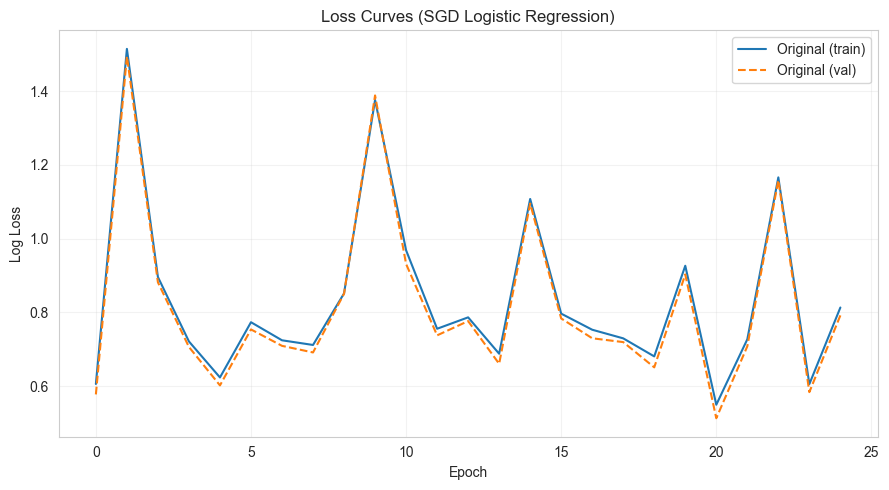

In [84]:
plot_loss_curves({"Original": histories["Original (Imbalanced)"]})

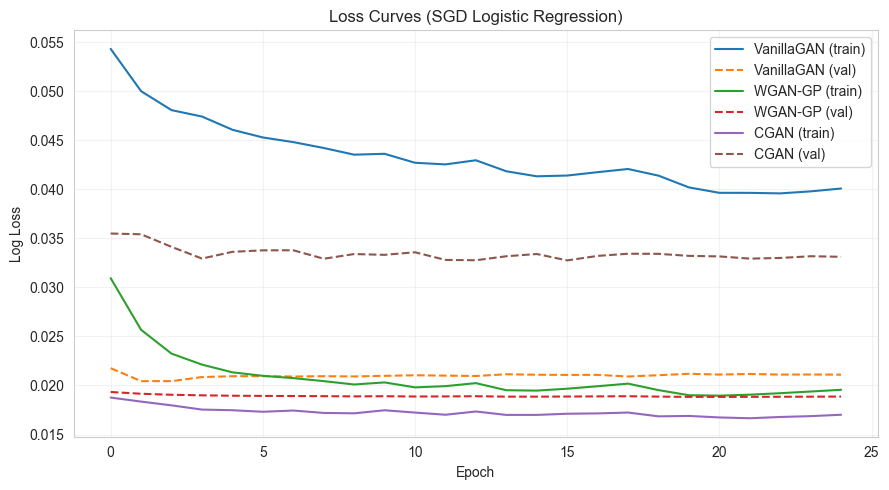

In [85]:
plot_loss_curves({
    "VanillaGAN": histories["VanillaGAN-balanced"],
    "WGAN-GP": histories["WGAN-GP-balanced"],
    "CGAN": histories["CGAN-balanced"],
})


## Confusion Matrices

In [86]:
def plot_confusion_matrix_single(cm, title):
    plt.figure(figsize=(4.5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Normal (0)", "Fraud (1)"],
        yticklabels=["Normal (0)", "Fraud (1)"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()


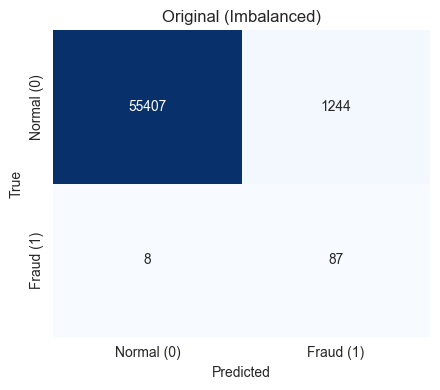

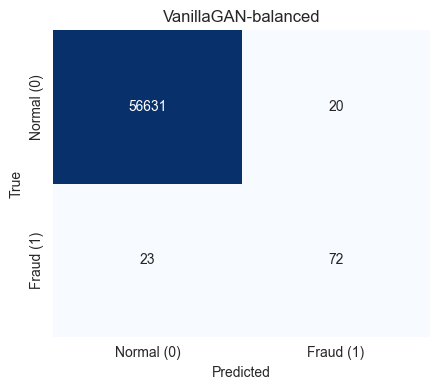

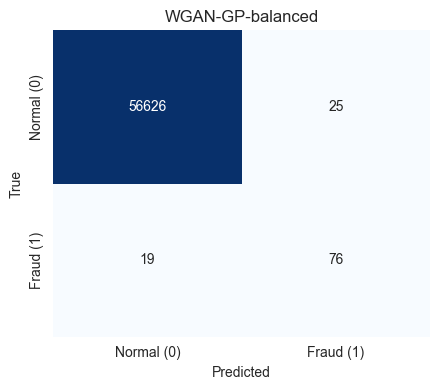

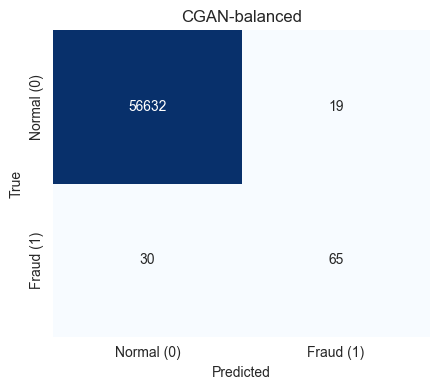

In [87]:
for r in results:
    plot_confusion_matrix_single(
        r["cm"],
        title=r["name"]
    )
